In [2]:
import sys
sys.path.append("/Users/maithoma/work/github/bayesLearn/scripts/")
from Entro import *
%matplotlib inline

try:
    reload(bayesLib)
except:
    import bayesLib

from bayesLib import *

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
simplName = "simpleConvergenceMeans"
complName = "complexConvergenceMeans"

In [4]:
distances = {}
distances["simple"] = loadDistances(treatment="simple",remove_duplicates=False)
distances["complex"] = loadDistances(treatment="complex",remove_duplicates=False)

In [5]:
treatment = "simple"
treatment_dic = pd.read_pickle(dir + "Data/%s_models"%treatment)

## Memory

In [1547]:
treatment = "complex"
treatment_dic = pd.read_pickle(dir + "Data/%s_models"%treatment)

205 205 205 205 205


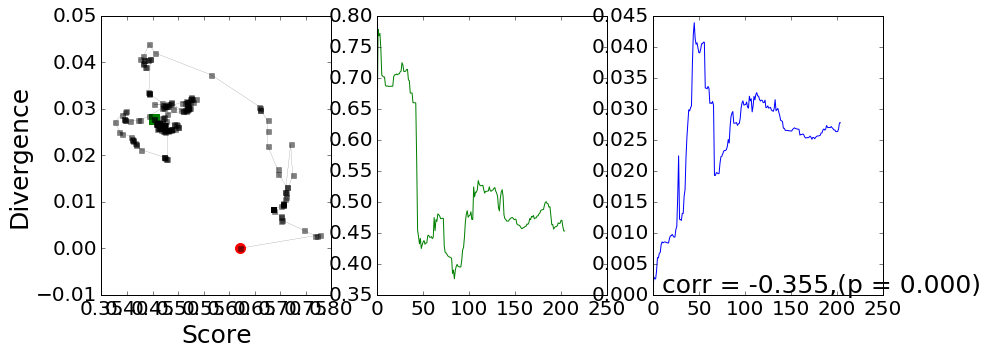

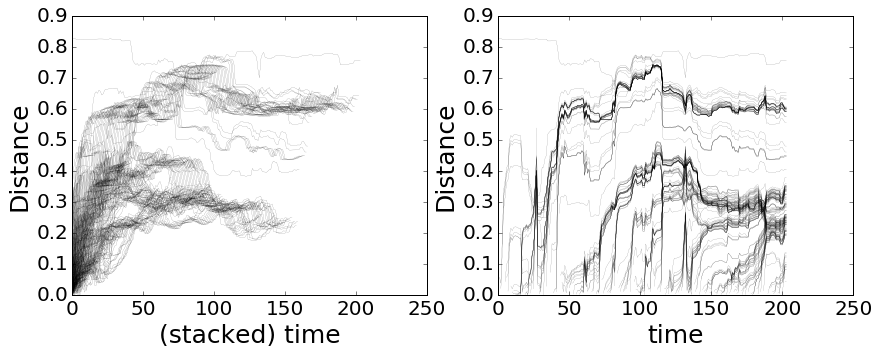

In [1599]:
dic = convergence(treatment_dic.keys()[47],treatment=treatment)
x = dic['score']
y = dic['sum_dst']/dic['index']

cond = (np.logical_not(np.isnan(y)))*(np.logical_not(np.isnan(x)))

x = x[cond]
y = y[cond]

dx = np.diff(x)
dy = np.diff(y)

pl.figure(1,(14,5))
pl.subplot(131)
pl.plot(x,y,'ks-',ms=5,lw=0.25,alpha=0.5)
pl.scatter(x[0],y[0],marker='o',color='r',s=100)
pl.scatter(x[-1],y[-1],marker='s',color='g',s=100)
pl.xlabel("Score")
pl.ylabel("Divergence")

pl.subplot(132)
pl.plot(x,'g-',label="Score")

pl.subplot(133)
pl.plot(y,'b-',label="Divergence")
#pl.legend(loc=0)
#pl.ylim(ymin=-0.001)
corr = S.spearmanr(x,y)
pl.text(10,0.0005,"corr = %.3f,(p = %.3f)"%(corr[0],corr[1]))

#corr = S.spearmanr(x[1:42],y[:41])
#print "corr before Divergence peak: ",corr
#corr = S.spearmanr(x[53:],y[43:-10])
#print "corr after Divergence peak: ",corr


pl.figure(4,(14,5))
pl.subplot(121)
pl.xlabel("(stacked) time")
pl.ylabel("Distance")
plotDistanceEvol(dic,stacked=True)

pl.subplot(122)
pl.xlabel("time")
pl.ylabel("Distance")
plotDistanceEvol(dic,stacked=False)

In [1503]:
def plotDistanceEvol(dic,stacked=True,plot=True):

    nghbs_dst = {}
    
    for iter in range(len(dic['distance'].keys())):
        nghbs = dic['distance'][iter]['order']
        for n  in nghbs:
            d = np.array(dic['distance'][iter]['dst'])[n]
            try:
                nghbs_dst[n].append(d)
            except:
                nghbs_dst[n] = [d]

    
    if plot:       
        for iter in range(len(dic['distance'].keys()))[:-1]:
            if stacked:
                pl.plot(np.array(nghbs_dst[iter]),'k-',lw=0.1)
            else:
                y = np.array(nghbs_dst[iter])
                x = np.arange(iter,iter + len(nghbs_dst[iter]))
                #print len(x),len(y)
                pl.plot(x,y,'k-',lw=0.1)



205 205
LinregressResult(slope=-0.40452071144471863, intercept=-0.56954959818054973, rvalue=-0.69784472652142182, pvalue=3.0178760173309077e-31, stderr=0.02914056826785651)
LinregressResult(slope=-0.43760808717985755, intercept=-0.50736044127014424, rvalue=-0.90113408093753145, pvalue=1.5986541471938885e-13, stderr=0.036649548773516075)


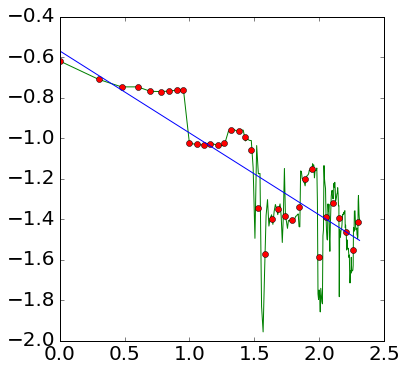

In [1105]:
xDecay = x[52:] - 0.25
cond = xDecay > 0
lyDecay = np.log10(xDecay[cond])
lxDecay = np.log10(range(1,len(lyDecay) + 1))

print len(lxDecay),len(lyDecay)

B = binning(lxDecay,lyDecay,50)
fit = S.linregress(lxDecay,lyDecay)
print fit
fitB = S.linregress(B['bins'],B['mean'])
print fitB

pl.plot(lxDecay,lyDecay,'g-')
pl.plot(B['bins'],B['mean'],'ro')
pl.plot(lxDecay,lxDecay*fit[0]+fit[1],'-')

In [1366]:
dScore = np.diff(dic['score'])
o = np.argsort(dScore)
#o = np.argsort(dic['score'])
y = dic['sum_dst']/dic['index']
print o
#print dScore[o]
#print dic['index'][1:][o]
#print dic['score'][1:][o]
#print dScore[o]
#print np.mean(y[o][:45]),np.mean(y),len(y)
print np.mean(y[o][:10]),np.mean(y),len(y)

[ 43  14   1  60   4  13  32  24  86  52   5 171  82  25 235 148 105 201
 248  81  84  37 147  15  30  53 163 170   9  91  77 102 160 142  55  34
 217 192 199 164 101  33  18 120 221 273 230 124 185  11  46 274  94 261
  29 191 161 168 219  87 198 245 165  98 107 262  38 137 189 267 162 152
 223  97 126 106 128 231  73 275  26  22 243 203  79 227 263 257  36 228
 154 204 151 140 155   3 269  66  12 149 178  61  68  10  47 214 276  62
 234 127  19 250 111 156 244 224  65 123  39  56 240 125 135 237 166  48
  76 268 211  80  49 186 225 121 212 109  50  67  51  54  63 253 112 264
 265  74 252 260 220 110 259 141 187 200 251 117  85  59 114 238 144 145
 226 132 216 236 207 119 113 256 176 196  21 239 266 118 115   2 174 138
 229  57  71  23 270 175 206 133 172 193 194 184 218  75 131 116 213 173
 215 246 254  72 233 241  93 232  20 210  64 208 146 150 136 195 205 130
  58 100  78 158  16 183 177 134  45 209  99 272 108 197 222 190  92  96
 169 129 153  69 242 143  35   8 139  95 181 182  2

In [1363]:
order = dic['distance'][iter]['order']
print dic['distance'][iter]['order'][:10]
dic['distance'][iter]['dst'][order][:10]

[276 275 261 260 274 262 271 272 270 269]


array([ 0.00248036,  0.00869753,  0.02059161,  0.02062547,  0.02246531,
        0.02540864,  0.02829965,  0.02876887,  0.02967021,  0.02978631])

278
16
1.83013232198 0.666666666667 9


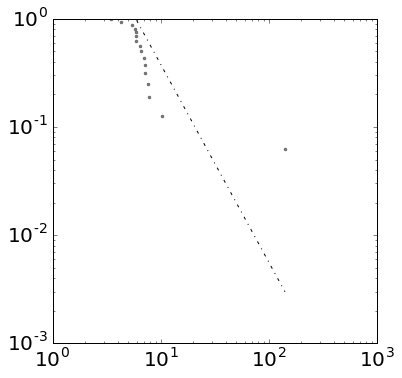

In [1421]:
print len(dic['distance'].keys())
iter = 16
print iter
x,y= rankorder(1./(dic['distance'][iter]['dst'])**2)
#pl.loglog(x,y,'o')
#print x[3:]
plfit = plotPowerLawFit(x,xmin=6,continuousFit=True,addnoise=False,confint=.01,plot=True)

In [1429]:
span = 30

nghbs_dst = {}

for iter in range(len(dic['distance'].keys())):

    nghbs = dic['distance'][iter]['order']
    intersection = [cnode  for cnode in nghbs[:span] if cnode in o[:span]]
    
    for n  in nghbs:
        d = np.array(dic['distance'][iter]['dst'])[n]
        try:
            nghbs_dst[n].append(d)
        except:
            nghbs_dst[n] = [d]
            
    #G = np.round(1/(np.array(dic['distance'][iter]['dst'])[closest_nodes[:span]])**2,2)
    #Ginter = np.round(1/(np.array(dic['distance'][iter]['dst'])[intersection])**2,2)
    G = np.round((np.array(dic['distance'][iter]['dst'])[nghbs[:span]]),2)
    Ginter = np.round((np.array(dic['distance'][iter]['dst'])[intersection]),2)

    #print iter,np.round(dic['score'][iter],3),np.round((dic['sum_dst']/dic['index'])[iter],4)
    
    #print np.round(np.array(nghbs)[:span],2),G
    #print np.round(intersection,2),Ginter
    #print "\n"

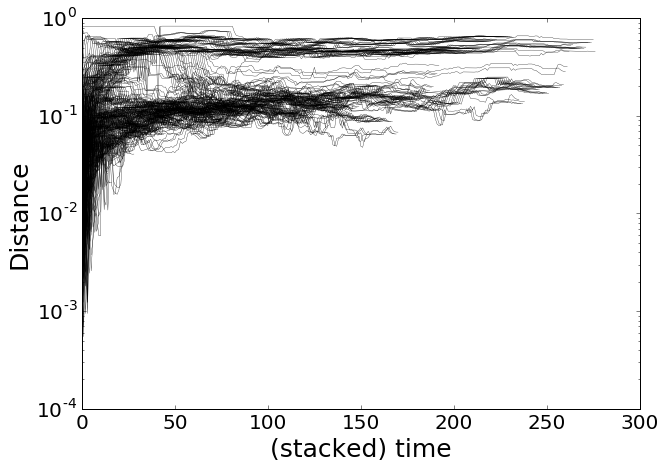

In [1452]:
pl.figure(1,(10,7))
for iter in range(len(dic['distance'].keys()))[:-1]:
    pl.semilogy(np.array(nghbs_dst[iter]),'k-',lw=0.3)

pl.xlabel("(stacked) time")
pl.ylabel("Distance")

In [851]:
def convergence(key,treatment="simple"):
    
    V = []
    index = []
    
    score = distances[treatment][key]
    #cond = np.logical_not(np.isnan(score))
    #score = score[cond]

    Score = []
    sum_dst = []
    # Make V list / remove NaNs
    for i,v in enumerate(treatment_dic[key]): 
        if not isinstance(v, list):continue # skip NaNs

        try:
            if not list(v)==V[-1]:
                V.append(list(v))
                index = np.append(index,i)
                Score = np.append(Score,score[i])
        except:
            V.append(list(v))
            index = np.append(index,i)
            Score = np.append(Score,score[i])
        
    # Compute distance
    
    distance = {}
    for i,ix in enumerate(V):
        distance[i] = {'dst': []}
        for j,jx in enumerate(V[:i]):
            distance[i]['dst'] = np.append(distance[i]['dst'],Distance(np.round(ix,10),np.round(jx,10)))
    
        o = np.argsort(distance[i]['dst'])
        distance[i]['order'] = o
        sum_dst = np.append(sum_dst,np.sum(distance[i]['dst']))
    
    
    #print len(V),len(index),len(Score),len(distance),len(sum_dst)
    
    return {'V' : V, 'index': index, 'distance': distance,'score':Score,'sum_dst':sum_dst}
    

111 111 111 111 111
47 47 47 47 47
128 128 128 128 128
40 40 40 40 40
86 86 86 86 86
188 188 188 188 188
156 156 156 156 156
28 28 28 28 28
114 114 114 114 114
113 113 113 113 113
293 293 293 293 293
62 62 62 62 62
369 369 369 369 369
75 75 75 75 75
27 27 27 27 27
121 121 121 121 121
219 219 219 219 219
191 191 191 191 191
178 178 178 178 178
114 114 114 114 114
37 37 37 37 37
51 51 51 51 51
18 18 18 18 18
77 77 77 77 77
74 74 74 74 74
278 278 278 278 278
54 54 54 54 54
130 130 130 130 130
187 187 187 187 187
273 273 273 273 273
305 305 305 305 305
226 226 226 226 226
67 67 67 67 67
187 187 187 187 187
154 154 154 154 154
263 263 263 263 263
492 492 492 492 492
47 47 47 47 47
180 180 180 180 180
78 78 78 78 78
234 234 234 234 234
69 69 69 69 69
221 221 221 221 221
44 44 44 44 44
292 292 292 292 292
276 276 276 276 276
83 83 83 83 83
288 288 288 288 288


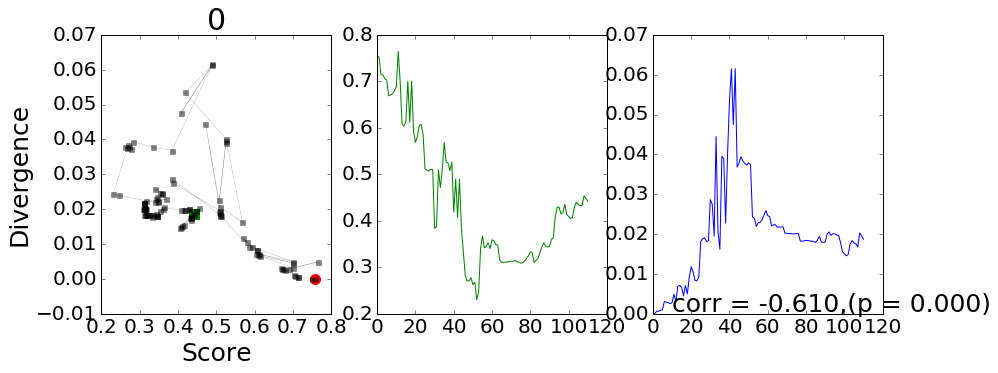

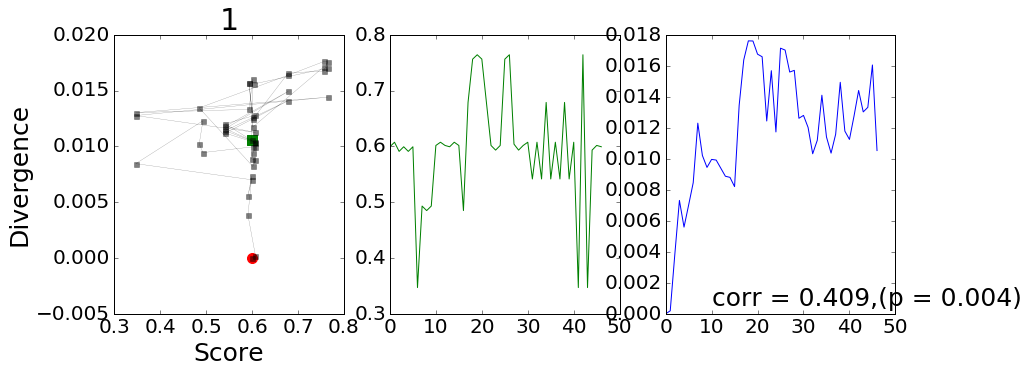

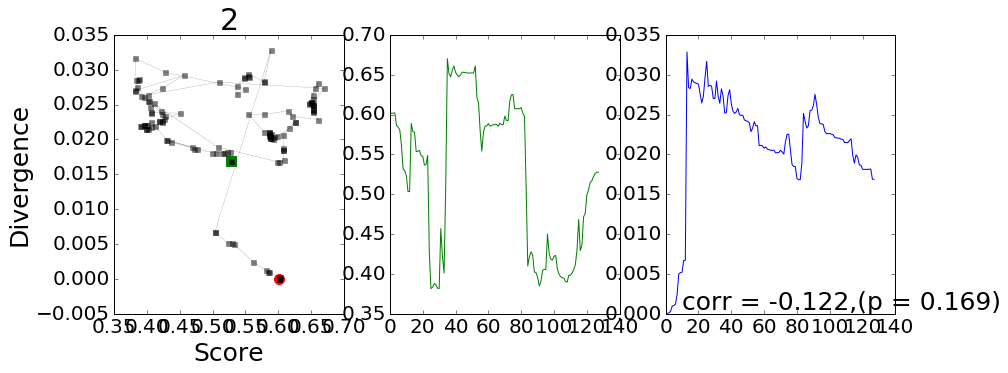

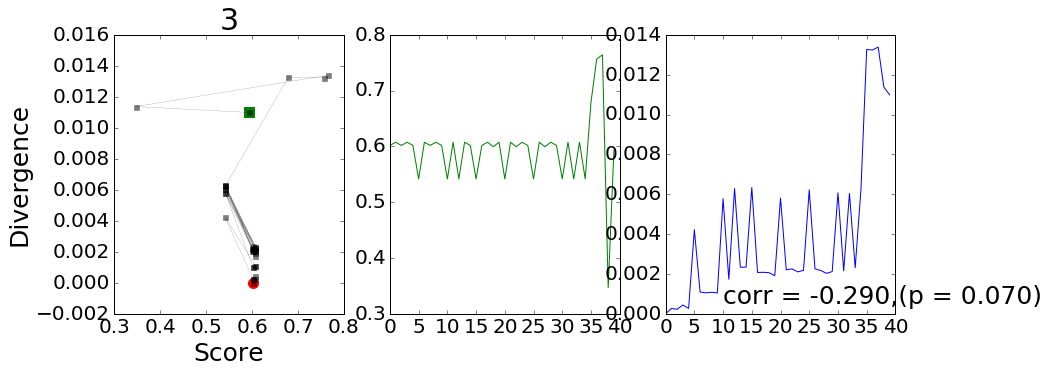

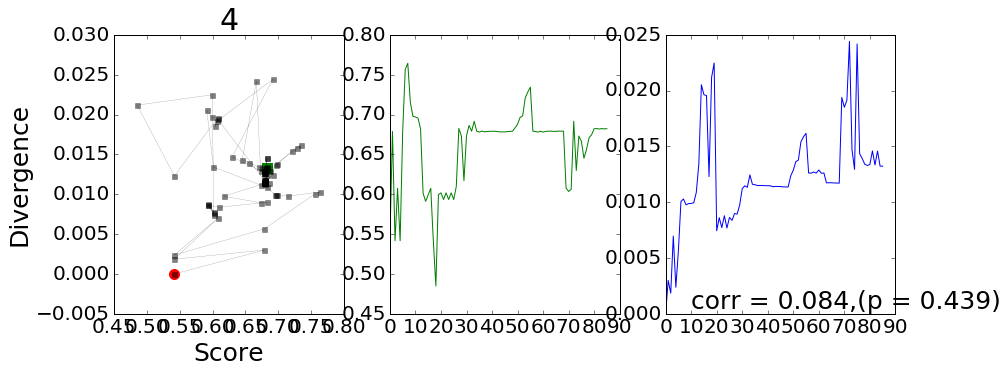

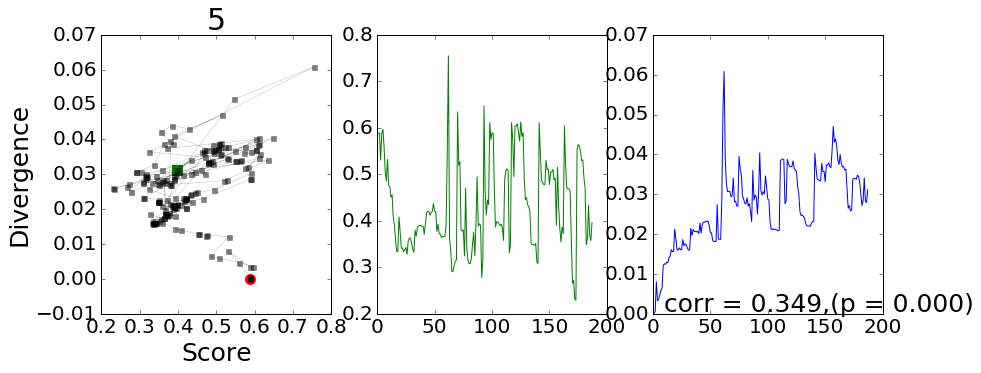

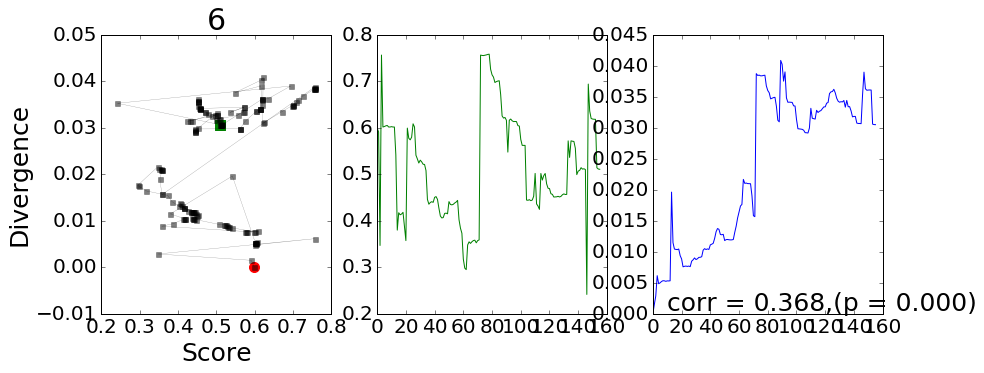

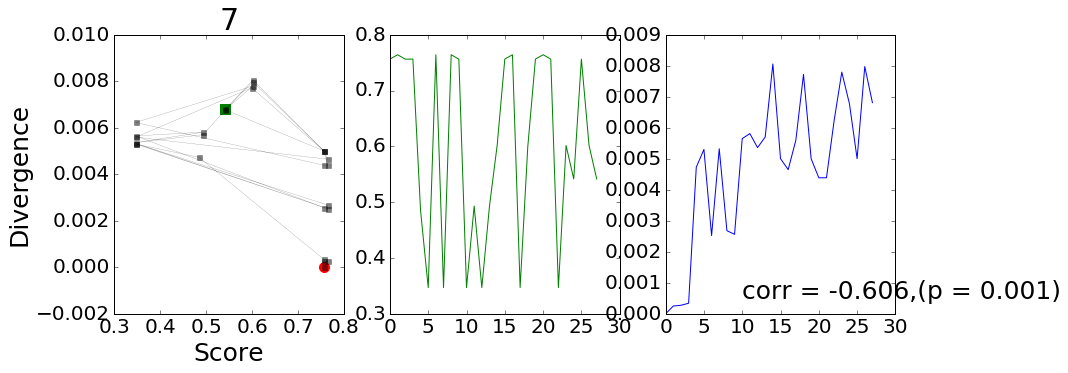

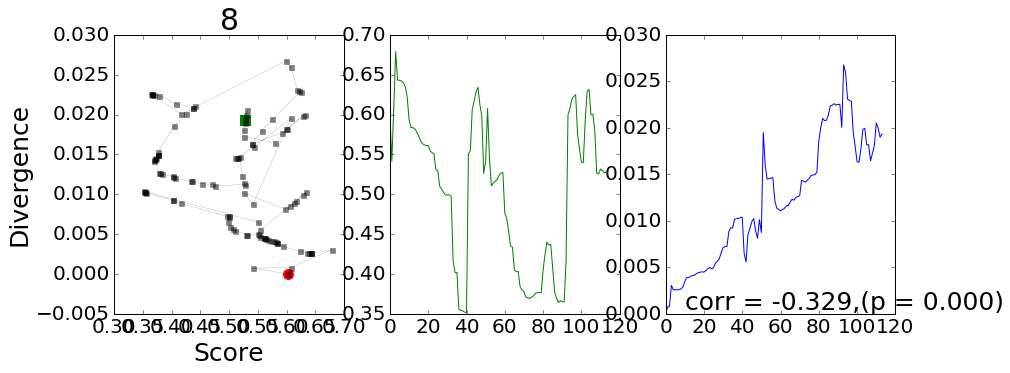

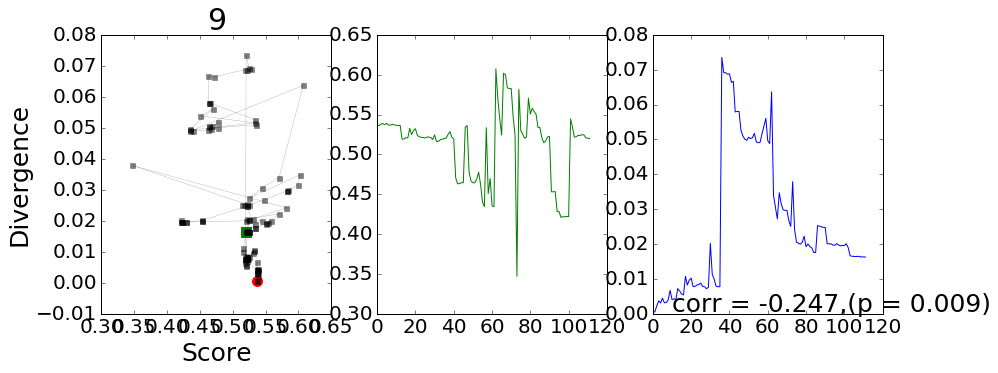

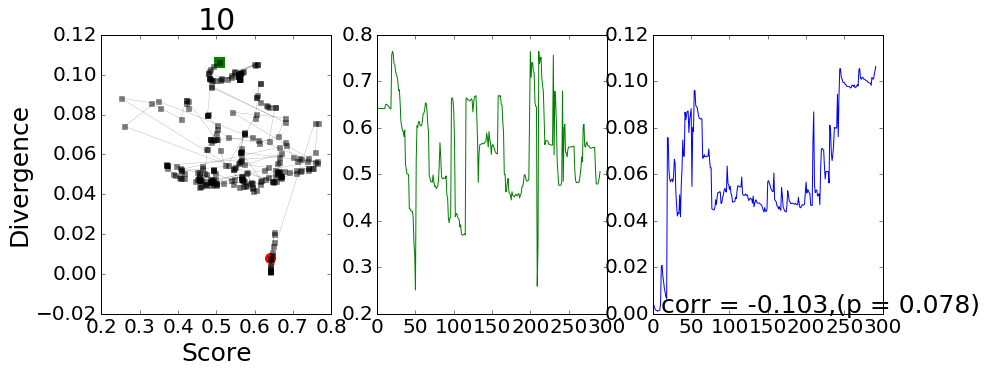

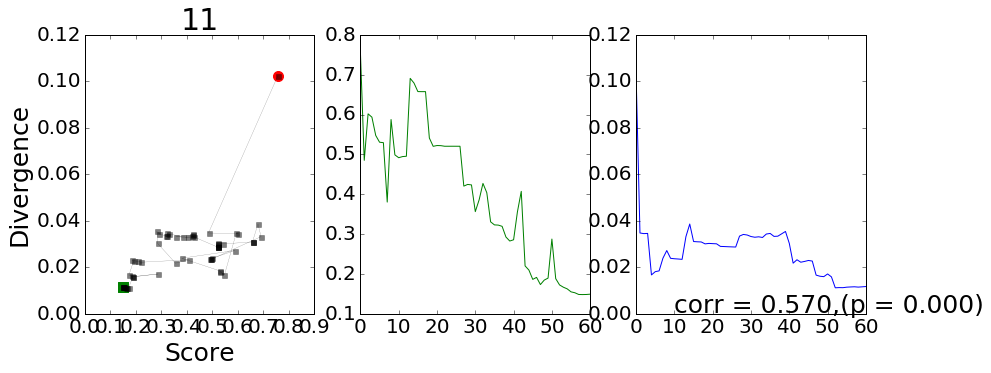

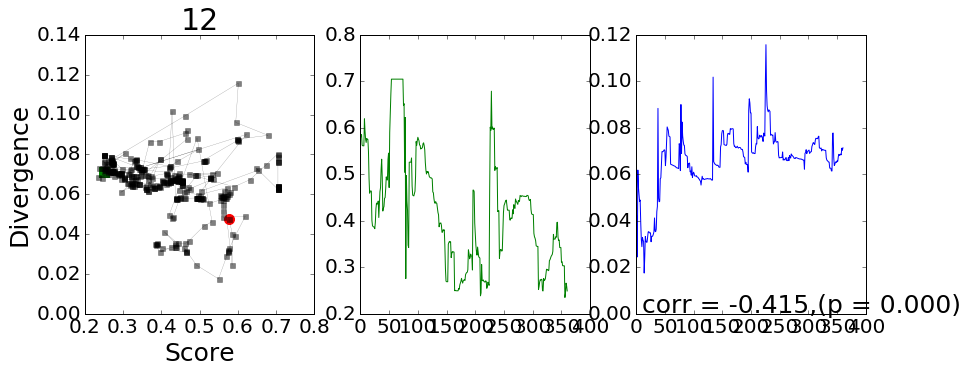

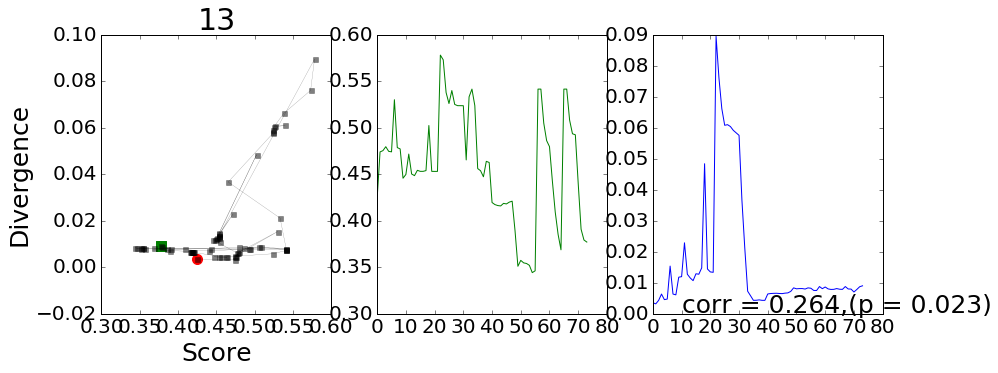

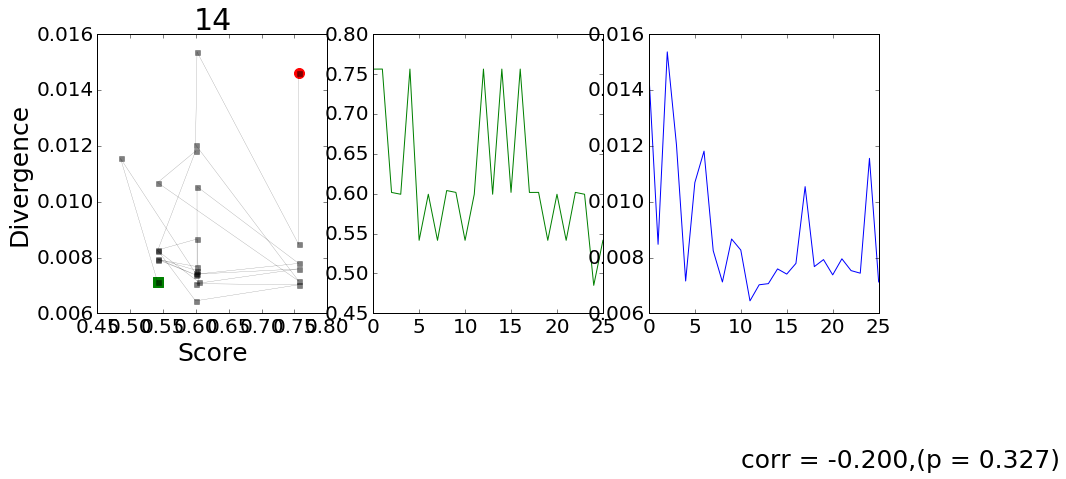

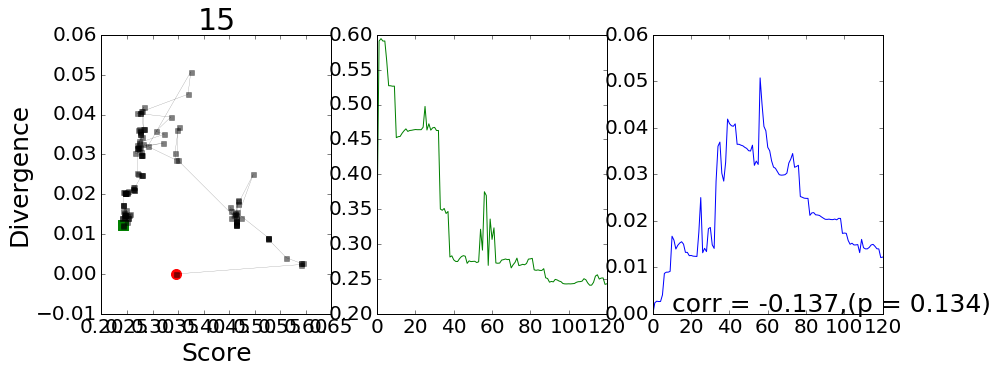

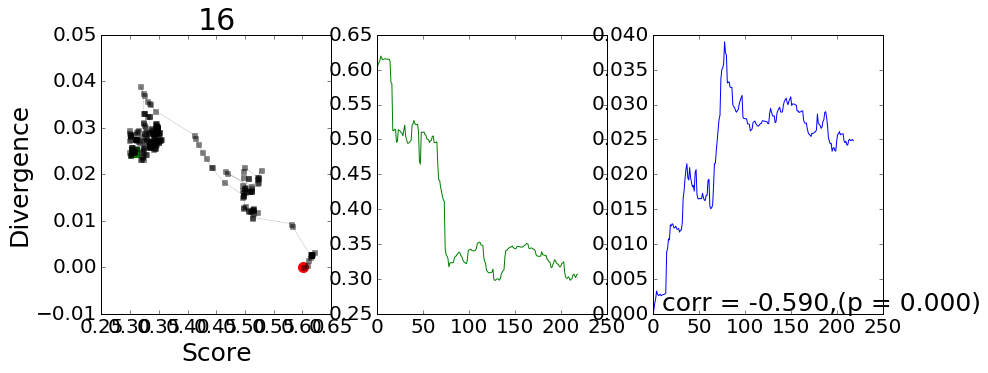

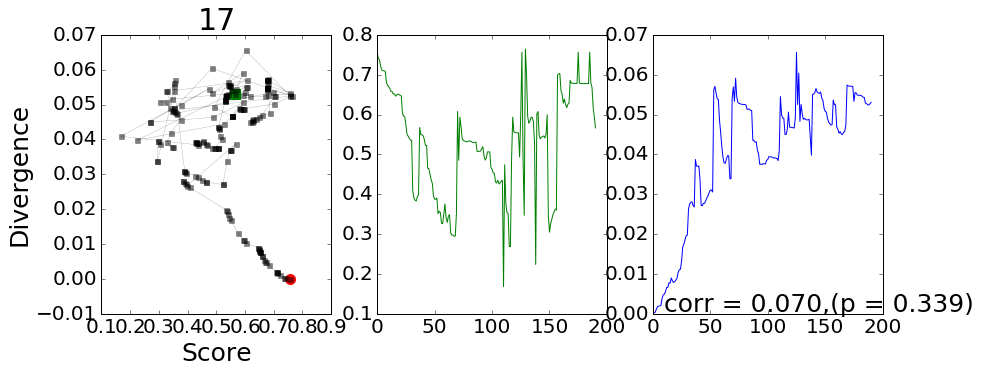

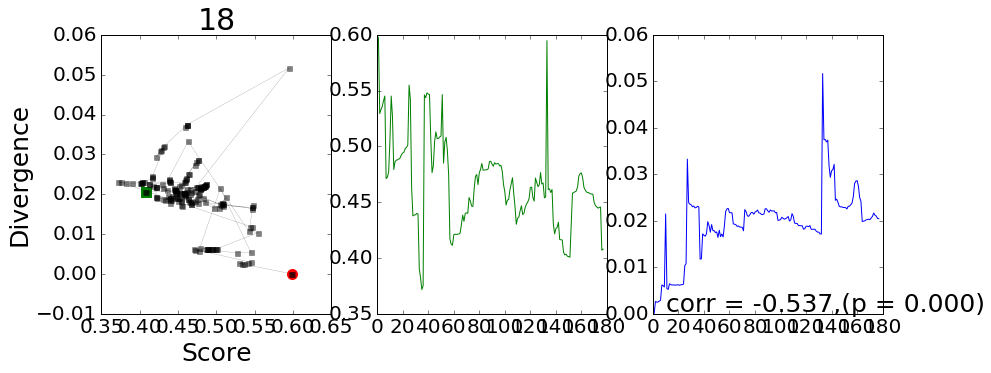

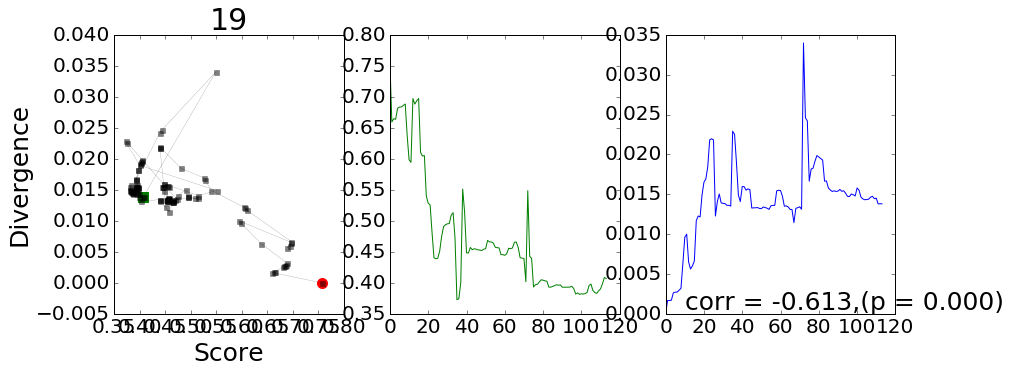

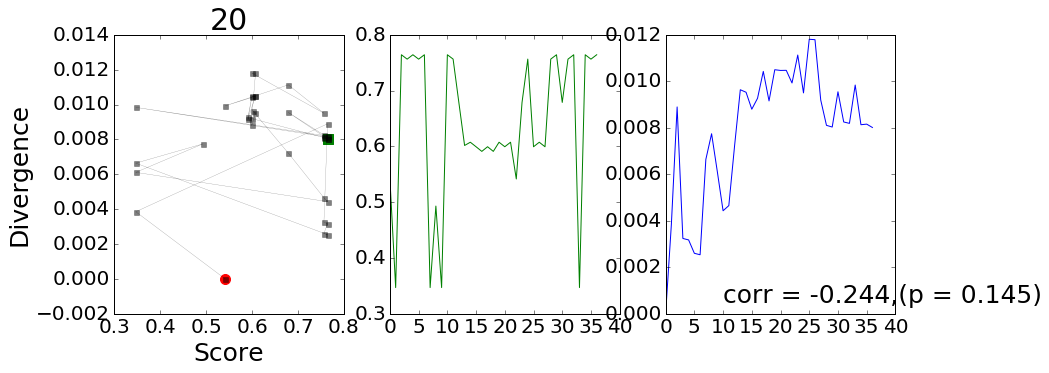

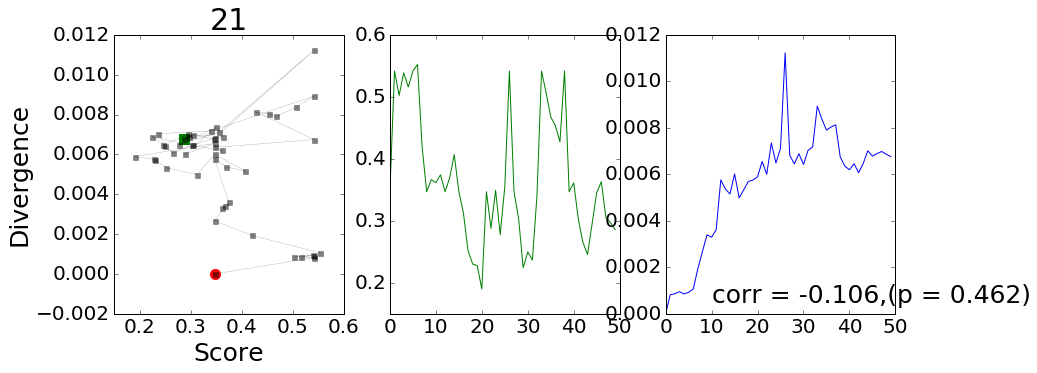

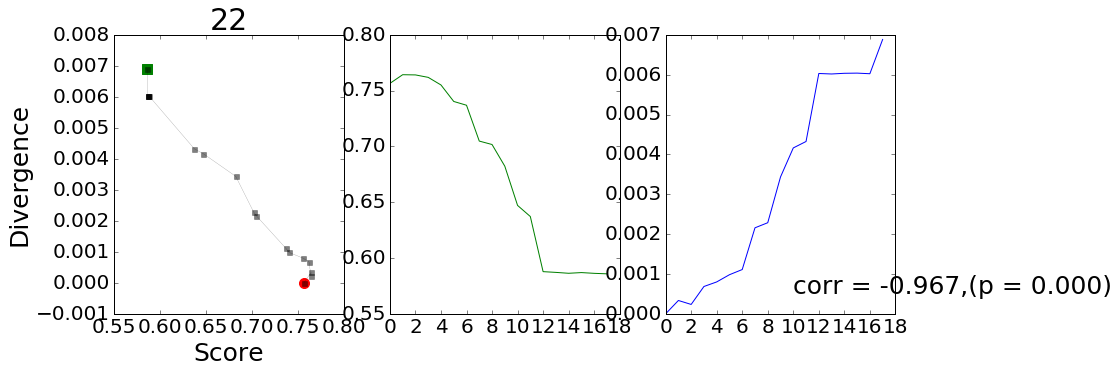

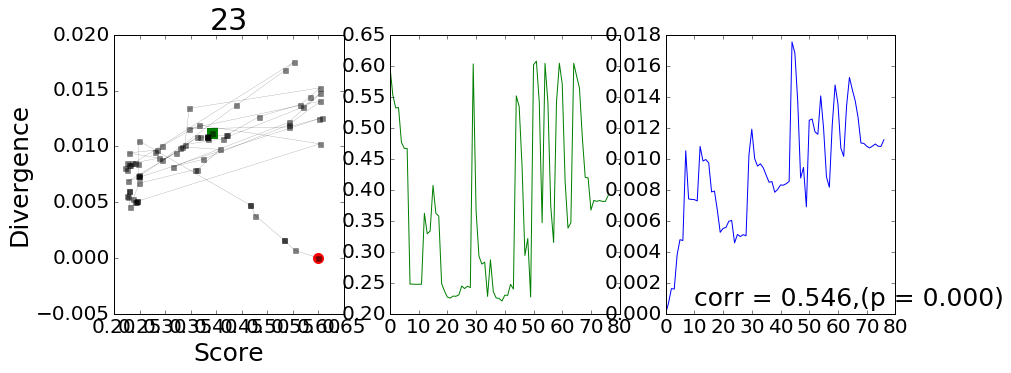

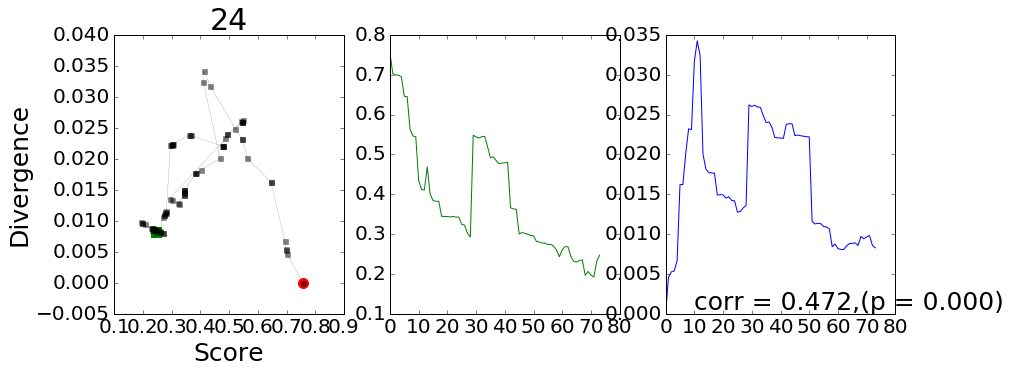

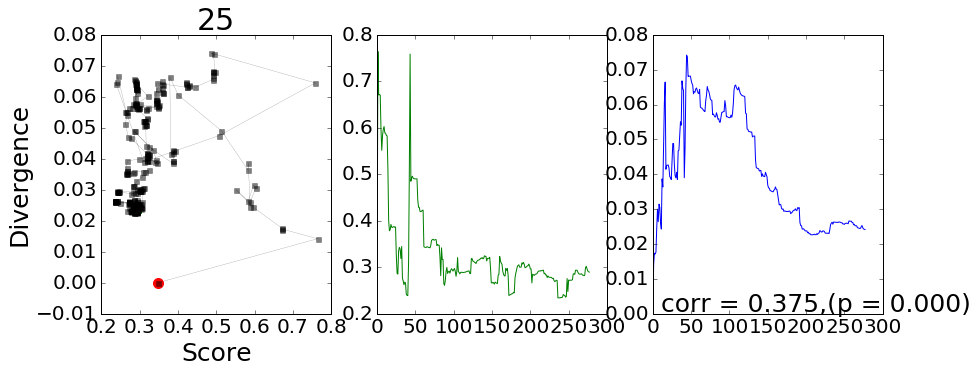

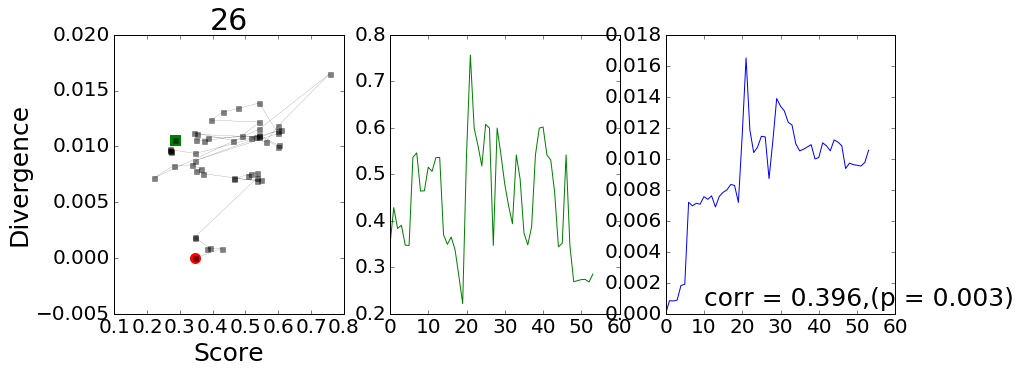

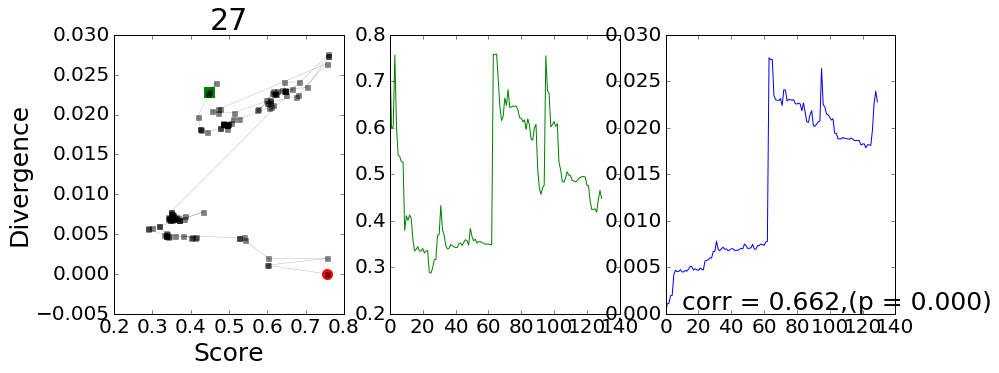

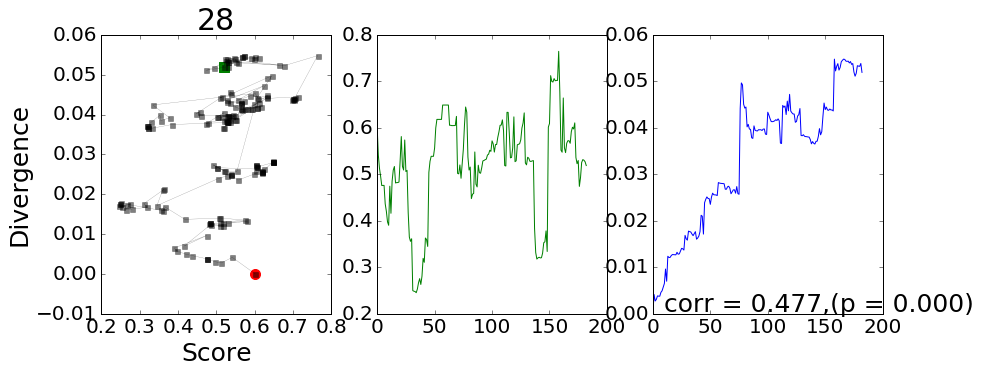

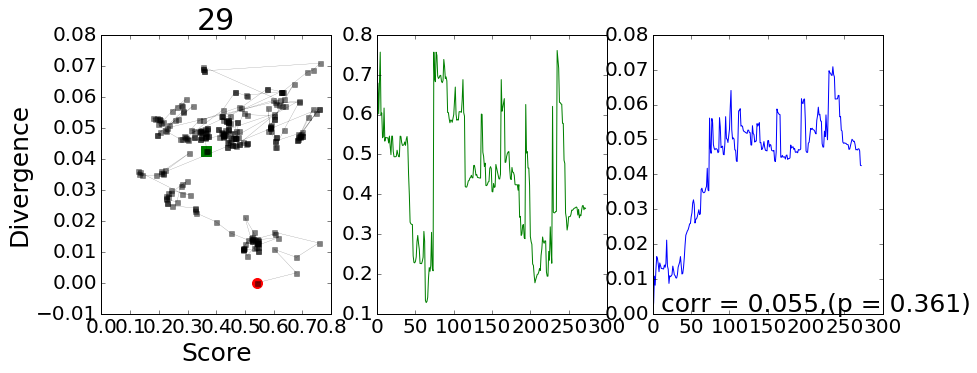

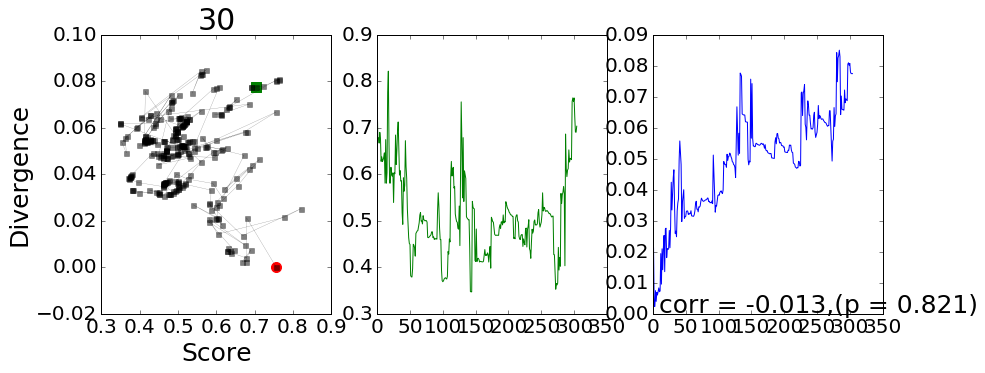

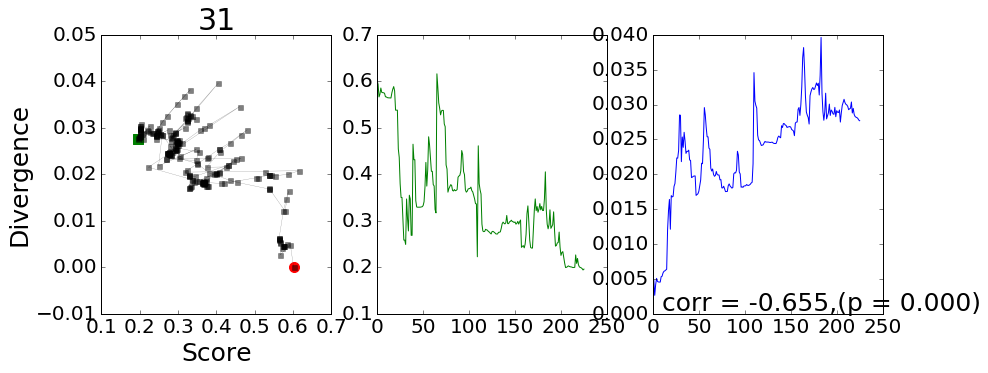

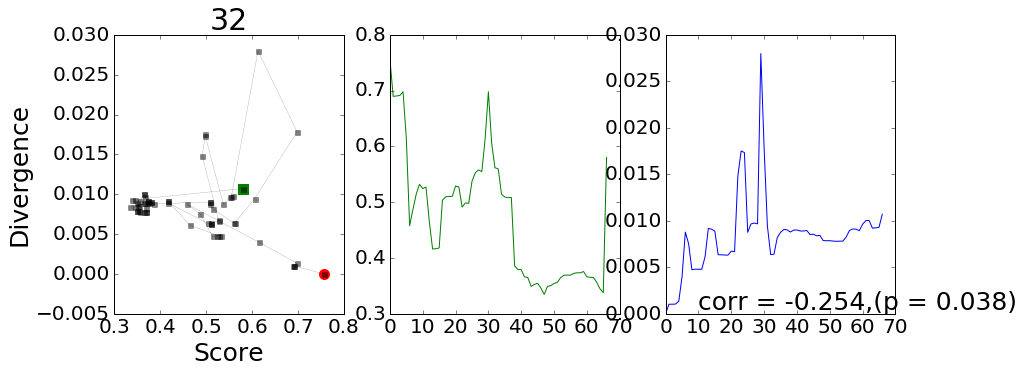

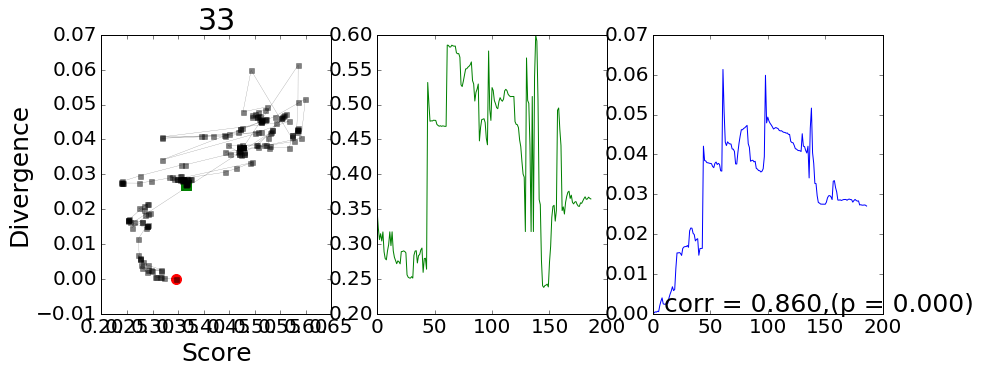

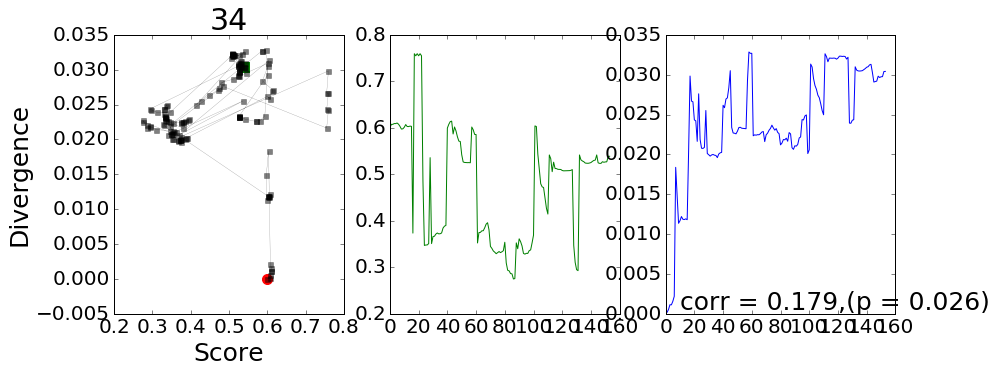

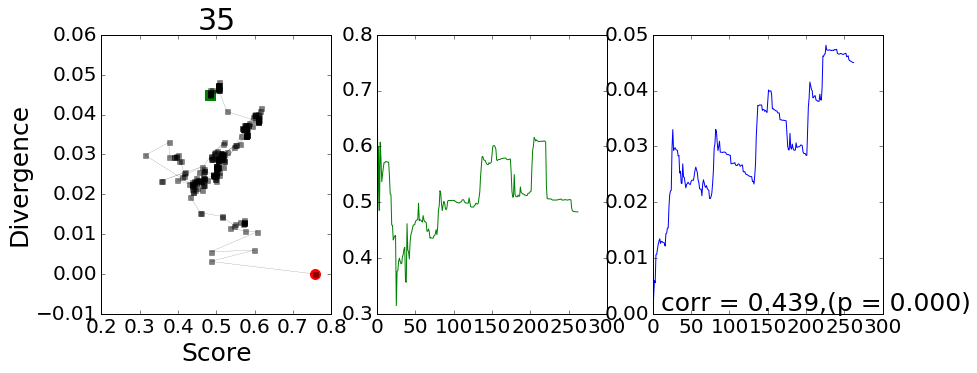

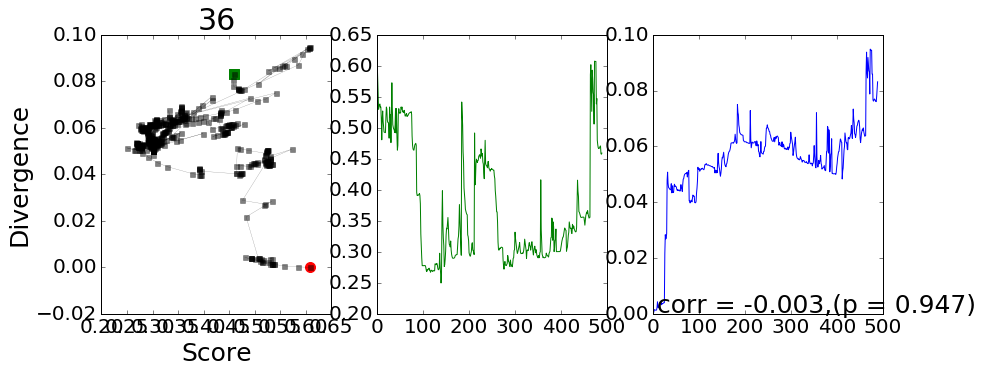

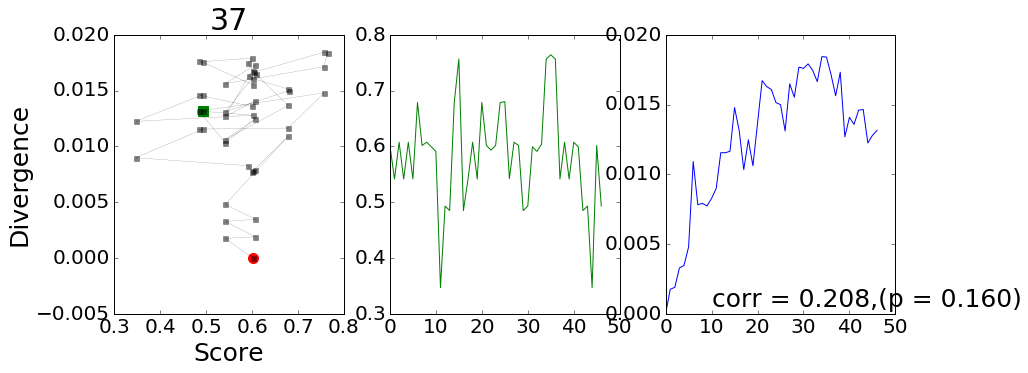

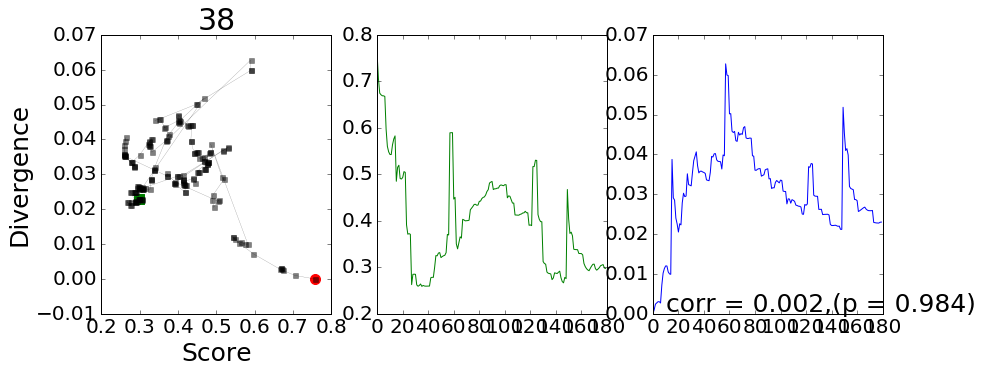

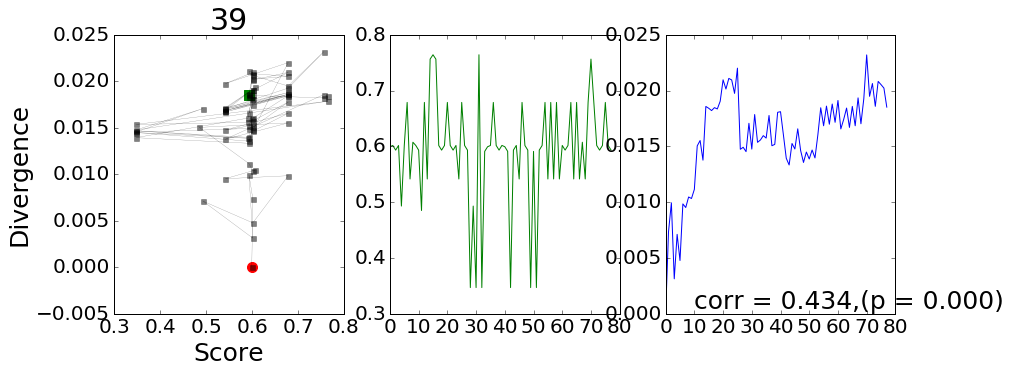

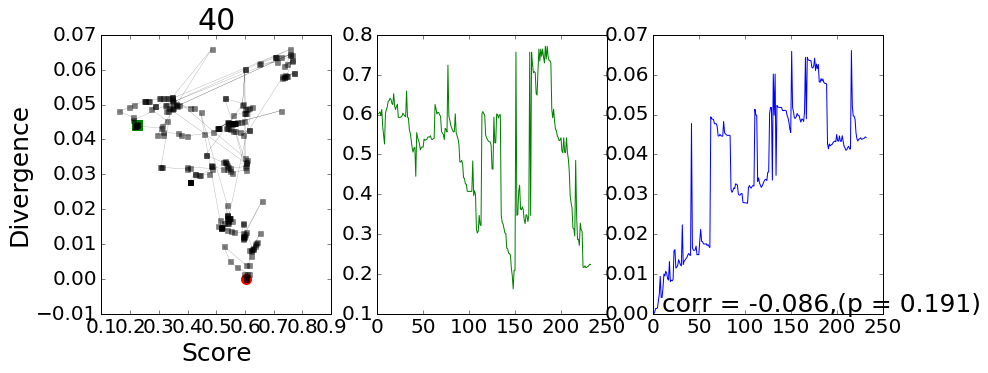

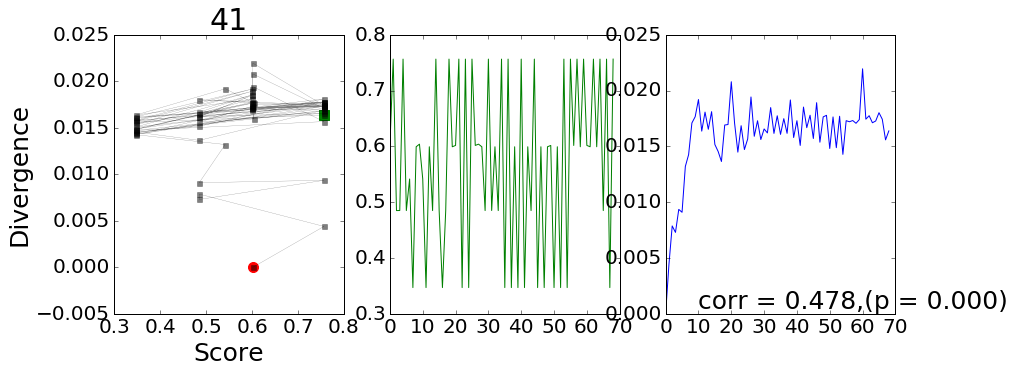

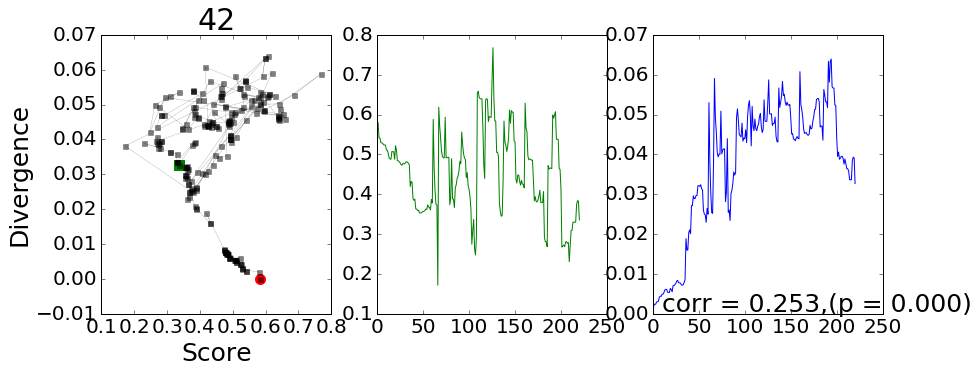

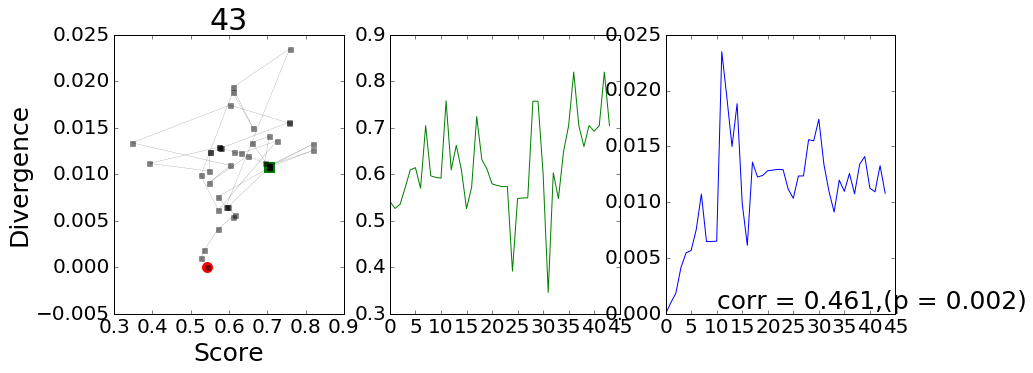

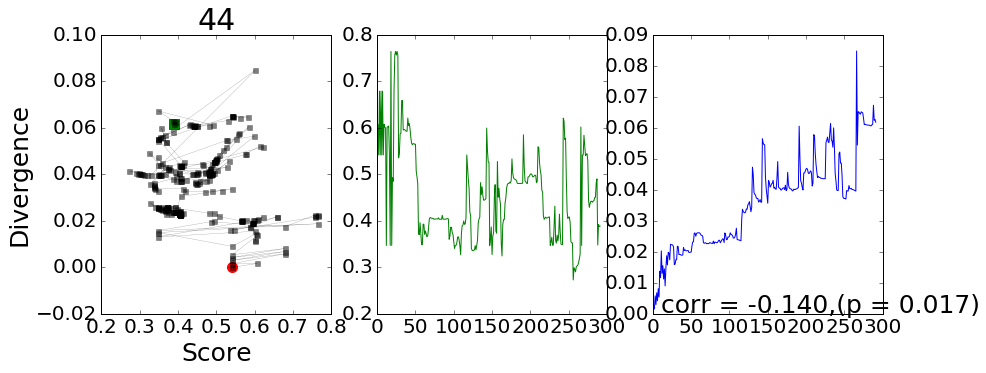

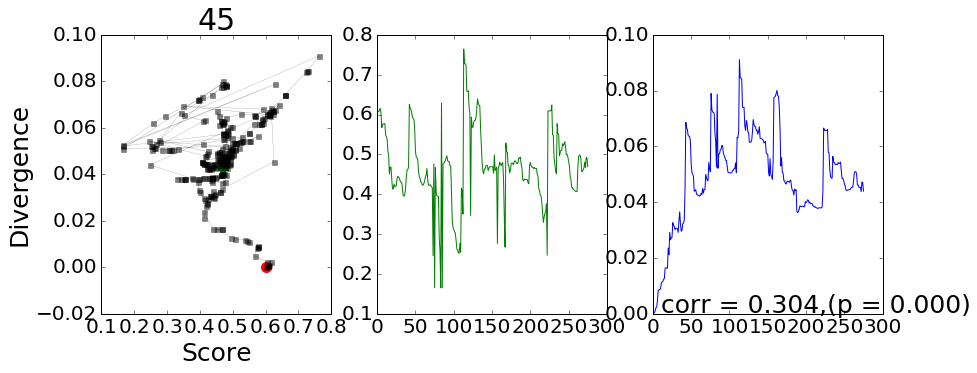

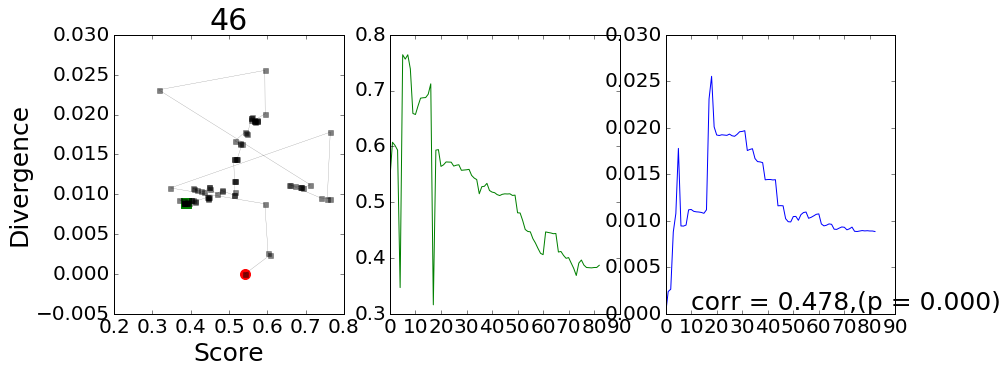

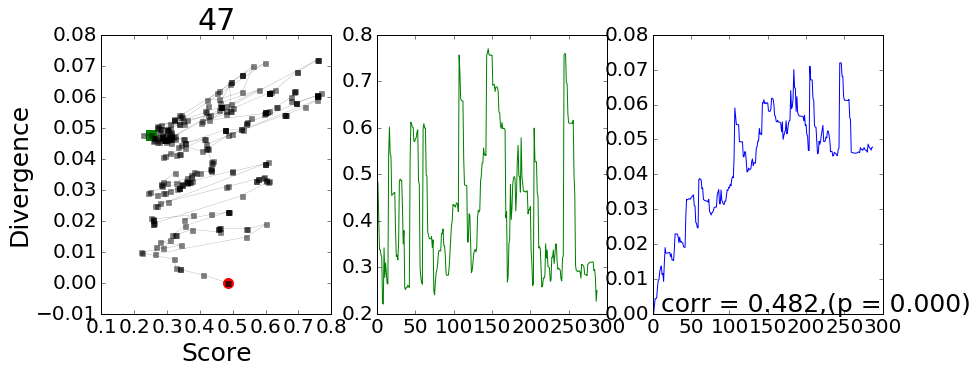

In [962]:

for k,key in enumerate(treatment_dic.keys()):
#key = treatment_dic.keys()[16]
    dic = convergence(key,treatment=treatment)

    index = dic['index']
    x = dic['score']
    y = dic['sum_dst']/dic['index']

    cond = (np.logical_not(np.isnan(y)))*(np.logical_not(np.isnan(x)))

    x = x[cond]
    y = y[cond]

    dx = np.diff(x)
    dy = np.diff(y)

    pl.figure(k,(14,5))
    pl.subplot(131)
    pl.title(k)
    pl.plot(x,y,'ks-',ms=5,lw=0.25,alpha=0.5)
    pl.scatter(x[0],y[0],marker='o',color='r',s=100)
    pl.scatter(x[-1],y[-1],marker='s',color='g',s=100)
    pl.xlabel("Score")
    pl.ylabel("Divergence")

    #pl.figure(2)
    #pl.plot(dx,dy,'.')
    #pl.xlabel("dScore")
    #pl.ylabel("dConvergence")
    #pl.xlim(-0.05,0.05)
    #pl.xlim(-0.1,0.1)

    #pl.subplot(122)
    #pl.plot(dx / float(np.max(dx)),'g-',label="Score")
    #pl.plot(dy / float(np.max(dy)),'b-',label="Convergence")
    #pl.legend(loc=0)

    pl.subplot(132)
    pl.plot(x,'g-',label="Score")
    
    pl.subplot(133)
    pl.plot(y,'b-',label="Divergence")
    #pl.legend(loc=0)
    #pl.ylim(ymin=-0.001)
    corr = S.spearmanr(x,y)
    pl.text(10,0.0005,"corr = %.3f,(p = %.3f)"%(corr[0],corr[1]))

0.939959767402 0.248069469178 65
225 225 225
SpearmanrResult(correlation=-0.20546830756097686, pvalue=0.001948447907399487)


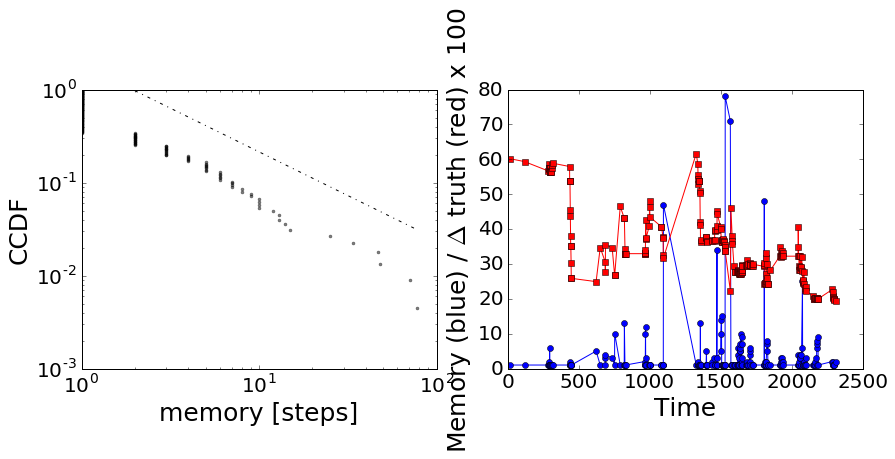

In [798]:
memory = []
##11,12

for k,key in enumerate(treatment_dic.keys()[31:32]):
    V = []
    index = []
    I = []

    for i,v in enumerate(treatment_dic[key]):
        if not isinstance(v, list):continue # skip NaNs

        try:
            if not list(v)==V[-1]:
                V.append(list(v))
                index = np.append(index,i)
        except:
            V.append(list(v))
            index = np.append(index,i)

    
    for i,ix in enumerate(V):
        distance_tT = []
        for j,jx in enumerate(V[:i]):

            dst = Distance(np.round(ix,10),np.round(jx,10))
            distance_tT = np.append(distance_tT,dst)

        o = np.argsort(distance_tT)
        if len(o) > 0:
            I = np.concatenate([I,o])
            memory.append((i - o[:])[0])
            
#x,y = rankorder(memory)
#pl.loglog(x,y,'o')
pl.figure(1,(14,5))
pl.subplot(121)

fit = plotPowerLawFit(memory,xmin=2,continuousFit=True,addnoise=True,plot=True)
pl.xlabel("memory [steps]")
pl.ylabel("CCDF")

pl.subplot(122)

dTruth = distances[treatment][key].values
cond = np.logical_not(np.isnan(dTruth))
dTruth = dTruth[cond]
cond = np.argwhere(np.diff(dTruth)!=0)
dTruth = dTruth[cond]

pl.plot(index[:-1],memory,'ob-')
#print len(index),len(dTruth)
try:
    pl.plot(index[:-1],dTruth*100,'sr-')
except:
    pl.plot(distances[treatment][key]*100,'sr-')
pl.xlabel("Time")
pl.ylabel("Memory (blue) / $\Delta$ truth (red) x 100")
print len(index[:-1]),len(memory),len(dTruth)
#print len(memory[:-1]),np.diff((dTruth).flatten())
print S.spearmanr(memory,dTruth)
#print index[:-1]
#print np.arange(len(distances[treatment][key]))[map(int,index[:-1])]

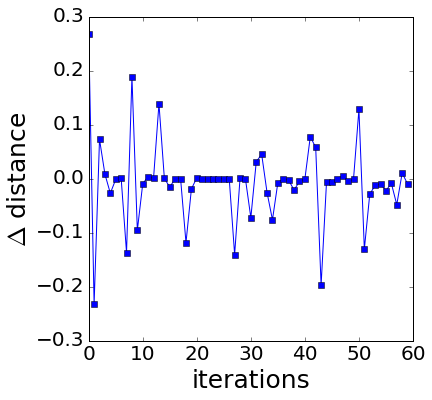

In [743]:
pl.plot(np.diff(distance_tT),'-s')
pl.ylabel("$\Delta$ distance")
pl.xlabel("iterations")

## Proportional Growth

In [244]:
V = []
index = []
I = []

for i,v in enumerate(treatment_dic[key]):
    if not isinstance(v, list):continue # skip NaNs

    try:
        if not list(v)==V[-1]:
            V.append(list(v))
            index = np.append(index,i)
    except:
        V.append(list(v))
        index = np.append(index,i)


for i,ix in enumerate(V[:]):
    distances = []
    for j,jx in enumerate(V[:i]):

        dst = Distance(np.round(ix,10),np.round(jx,10))
        distances = np.append(distances,dst)

    o = np.argsort(distances)
    if len(o) > 0:
        I = np.concatenate([I,o[:]])
        memory.append((i - o[:10])[0])
        if i == 224:
            print i,o[:10],np.round(distances[o][:5],5)

In [19]:
def OrderedMemory(V):
    
    out_dic = {}
    for i,ix in enumerate(V[:]):
        #print i
        if i == 0:
            continue
            
        distances = []
        memory = []
        
        for j,jx in enumerate(V[:i]):
            distances = np.append(distances,Distance(np.round(ix,10),np.round(jx,10)))
            
        index = np.argsort(distances)
        #if len(index) > 0:  
        memory.append((i - index)[0])
        
        dstArray = {}
        
        for j,jx in enumerate(index):
            for k,kx in enumerate(index[:j]):
                dstArray[(jx,kx)] = Distance(np.round(V[jx],10),np.round(V[kx],10))
                
        out_dic[i] = {'index': index, 'distances' : distances, 'memory' : memory, 'dstArray' : dstArray}
    return out_dic


In [799]:
dic = OrderedMemory(V)

In [800]:
distances = {}
distances["simple"] = loadDistances(treatment="simple",remove_duplicates=True)
distances["complex"] = loadDistances(treatment="complex",remove_duplicates=True)

In [765]:
distances["simple"][key][index]

122.0     0.601671
140.0     0.607483
179.0     0.610230
180.0     0.613536
181.0     0.619569
182.0     0.616310
183.0     0.614344
184.0     0.614771
185.0     0.615518
202.0     0.615483
203.0     0.615187
204.0     0.615107
206.0     0.615051
207.0     0.614977
249.0     0.612319
250.0     0.581707
251.0     0.579858
329.0     0.512757
340.0     0.512440
341.0     0.514623
342.0     0.514311
357.0     0.495913
360.0     0.497255
361.0     0.514050
362.0     0.512730
363.0     0.512074
376.0     0.509805
377.0     0.509073
378.0     0.505233
391.0     0.513379
            ...   
1815.0    0.317350
1856.0    0.316005
1878.0    0.319976
1879.0    0.323177
1880.0    0.327499
1881.0    0.326097
1892.0    0.322911
1916.0    0.321426
1917.0    0.321216
1943.0    0.318245
1944.0    0.317186
1986.0    0.318639
1987.0    0.322534
1988.0    0.323130
1989.0    0.324565
2036.0    0.309693
2037.0    0.303171
2038.0    0.301238
2039.0    0.300917
2060.0    0.302913
2091.0    0.301384
2092.0    0.

In [801]:
score = distances['simple'][key]
cond = np.logical_not(np.isnan(score))
score = score[cond]
print len(score),len(D),len(index),len(dIndex)

226 124 226 124


In [802]:
prevalentIndex = []

D = []
dIndex = []
dScore = []

for iter in range(1,219):
    #print len(dic[iter]['index'])
    precursor = dic[iter]['index'][0]
    #print iter,
    while True:
        try:
            i = dic[precursor]['index'][0]
            dscore = np.diff(score.values)[iter]
            print iter,i,iter-i,dscore
            dIndex.append(iter-i)
            dScore.append(dscore)
            dst = dic[precursor]['distances'][i]
            D = np.concatenate([D,[dst]])
            #print "%s (%.4f)"%(precursor,dst)
            #precursor = dic[precursor]['index'][0]
            
            break
        except:
            print "\n"
            break
    #print "%s (%.2f)"%(precursor,dic[precursor]['distances'][dic[precursor]['index']][0]),
    #precursor = dic[precursor]['index'][0]
    #print "%s (%.2f)"%(precursor,dic[precursor]['distances'][dic[precursor]['index']][0]),
    #precursor = dic[precursor]['index'][0]
    #print "%s (%.2f)"%(precursor,dic[precursor]['distances'][dic[precursor]['index']][0])
    #prevalentIndex = np.concatenate([prevalentIndex,dic[iter]['index'][:1]])

#H = pl.hist(prevalentIndex,bins=100)



2 0 2 0.00586335985939
3 1 2 0.0132977643698
4 2 2 -0.0094324713095
5 2 3 -0.000526898785377
6 3 3 -0.000258617587056
7 5 2 -0.00100282058701
8 6 2 -0.00758470609938
9 2 7 -0.000371306034315
10 3 7 -0.00144118157121
11 9 2 -0.000450626347042
12 10 2 -0.000113396503706
13 11 2 -0.000124639585236
14 12 2 -0.000105313625502
15 13 2 0.0109100413513
16 14 2 0.00814845060906
17 15 2 0.00545447716432
18 16 2 -0.0093969687971
19 17 2 -0.0412829741951
20 18 2 -1.38203991751e-06
21 19 2 -6.07591962587e-06
22 19 3 -0.0834575983769
23 20 3 -0.0180512845026
24 22 2 -0.0568483782214
25 23 2 -0.0293479436671
26 24 2 -0.00012865281762
27 25 2 -0.046727977418
28 26 2 -0.0448280834129
29 27 2 5.08090789014e-06
30 28 2 -0.0094325502375
31 29 2 0.0978359462207
32 26 6 -0.0414111648691
33 27 6 -0.0274098196028
34 32 2 0.0768603275561
35 27 8 -0.00803934308425
36 27 9 -0.0782144980397
37 33 4 -5.03400659405e-05
38 34 4 0.195968422031
39 28 11 -0.0334311992101
40 29 11 0.000143347256348
41 39 2 -0.08805514

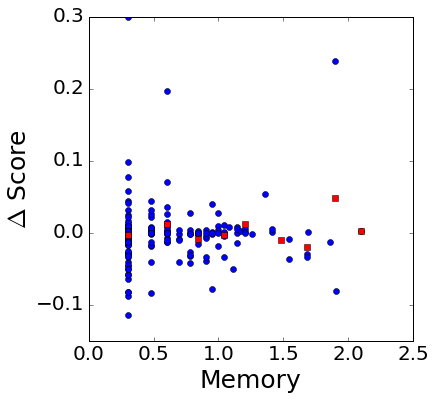

In [803]:
lx = np.log10(dIndex)
B = binning(lx,dScore,10)
pl.plot(lx,dScore,'o')
pl.plot(B['bins'],B['mean'],'rs')
pl.xlabel("Memory")
pl.ylabel("$\Delta$ Score")
#pl.ylim(-0.02,0.02)

In [755]:
iter = 5
length = 3
index = list(dic[iter]['index'][:length])
print  index[:10]
#print dic[iter]['distances'][index][:3]
#print dic[iter]['dstArray'][(214,215)]

dx = dic[iter]['distances'][index][0]


def explore(dic,iter):
    
    index = list(dic[iter]['index'])
    dx = dic[iter]['distances'][index][0]
    dy = dic[iter]['distances'][index][1]
    dxy = dic[iter]['dstArray'][(index[1],index[0])]
    dz = dic[iter]['distances'][index][2]

    #print dx,dy,dxy,dz
    s = np.sum([dx,dy,dxy])/2
    A = np.sqrt(s*(s-dx)*(s-dy)*(s-dxy))
    h = 2*A/dxy

    if h > dz:
        print h,">", dz 

[4, 0, 3]


1 0.57666992836
2 0.380816282142
3 0.400670035104
4 0.366785117506
5 0.269315787863
6 0.223694797134
7 0.191675212334
8 0.168370665573
9 0.175546587323
10 0.16043855956
11 0.158972519503
12 0.152139491279
13 0.142544671376
14 0.135139544382
15 0.129034377702
16 0.238160612342
17 0.274993626937
18 0.288812542443
19 0.278159146183
20 0.370283710961
21 0.349543742735
22 0.335819446346
23 0.350202947289
24 0.34385971393
25 0.360512979827
26 0.381602143736
27 0.367718312112
28 0.373943484637
29 0.440325723046
30 0.426037370681
31 0.438380848271
32 0.516433095548
33 0.49673951342
34 0.526572446959
35 0.487040458713
36 0.47015407402
37 0.474101428874
38 0.461946130808
39 0.477088766189
40 0.452469462175
41 0.44100333679
42 0.384068771577
43 0.37691558709
44 0.371051904732
45 0.363956417929
46 0.356602373036
47 0.348850036178
48 0.34421255969
49 0.339927461237
50 0.340487832428
51 0.350408761221
52 0.358266089728
53 0.395953869904
54 0.388491322537
55 0.451656853336
56 0.527432079417
57 0.5004

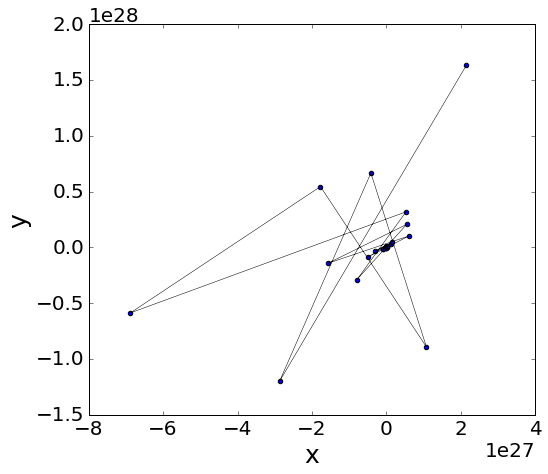

In [804]:
iter = 1
length = 3


pl.figure(1,(8,7))
pts = {0 : (0,0,0)}
coordinates = ['x_vec','y_vec','z_vec']
pl.scatter(pts[0][0],pts[0][1],label=iter)

SUM = []
l_range = range(1,len(dic.keys()[:]))

for iter in l_range:
    index = dic[iter]['index'][:length]
    dst_ = dic[iter]['distances'][index]
    
    SUM.append(np.sum(dic[iter]['distances']))
    print iter,np.sum(dic[iter]['distances'])/float(iter)
    #print  iter,index[:length],dst_
    if iter == 1:
        pts[iter] = (dst_[0],0,0)
        pl.scatter(pts[iter][0],pts[iter][1],label=iter)
        #print pts[iter]
    elif iter == 2:
        dAB = pts[1][0]
        dAC = dst_[np.argwhere(index == 0)[0]][0]
        dBC = dst_[np.argwhere(index == 1)[0]][0]
        s = np.sum([dAB,dAC,dBC])/2
        A = np.sqrt(s*(s-dAB)*(s-dAC)*(s-dBC))
        y = 2*A/dAB
        x = np.sqrt(dAC**2 + y**2)
        pts[iter] = (x,y,0)
        pl.scatter(pts[iter][0],pts[iter][1],label=iter)
        #print pts[iter]
    else:
        cD = xyzCoordinates(pts[iter-3],pts[iter-2],pts[iter-1],dst_[0],dst_[1],dst_[2],r_tolerance = 1e-5)
        #print cD
        #print [cD['x'],cD['y']],cD['cA'][:2]
        cD = changeOfBasis_2d([cD['x'],cD['y']],cD['cA'][:2],cD['alpha'])
        pts[iter] = (cD[0],cD[1],0)
        pl.scatter(pts[iter][0],pts[iter][1],label=iter)
        #print pts[iter]


o,coordinates = zip(*pts.items())
x = np.array(coordinates)[:,0][list(o)]
y = np.array(coordinates)[:,1][list(o)]
pl.plot(x,y,'k-',lw=0.5)
#pl.legend(loc=0)
pl.xlabel("x")
pl.ylabel("y")

217 217
SpearmanrResult(correlation=0.17515064468066951, pvalue=0.0097310232991361066)


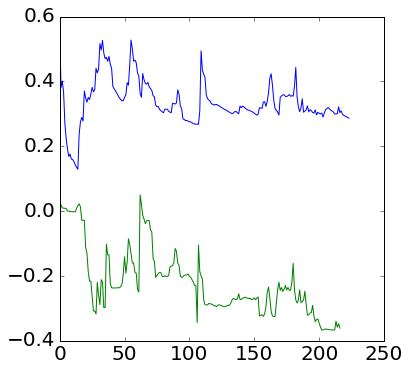

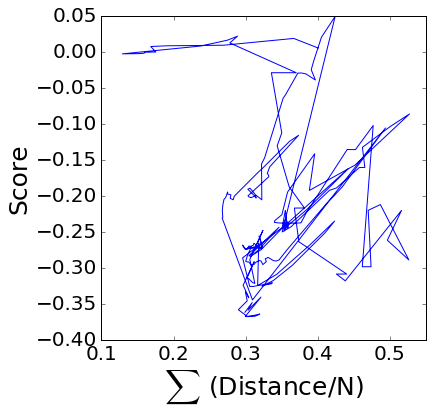

In [815]:
x = (np.array(SUM)/np.array(l_range))[2:-5]
y = np.cumsum(dScore)

print len(x),len(y)
print S.spearmanr(x,y)

pl.plot(np.array(SUM)/np.array(l_range),'b-')#
pl.plot(np.cumsum(dScore),'g-')

pl.figure(2)
pl.plot(x,y)
pl.xlabel("$\sum$ (Distance/N)")
pl.ylabel("Score")

In [701]:
def xyzCoordinates(cA,cB,cC,r1,r2,r3,r_tolerance = 1e-5):
    '''Trilateration of point D given coordinates of A,B,C
    and their respective distance to D'''
    
    dAB = distanceFromCoordinates(cA,cB)
    dAC = distanceFromCoordinates(cA,cC)
    dBC = distanceFromCoordinates(cB,cC)
    
    alpha = np.arctan2(cB[1],cA[0])
    
    s = np.sum([dAB,dAC,dBC])/2.
    A = np.sqrt(s*(s-dAB)*(s-dAC)*(s-dBC))
    j = 2*A/dAB
    i = np.sqrt(dAC**2 - j**2)
    #print A,i,j

    z = np.nan
    r3_0 = r3
    while np.isnan(z) and r3 < r3_0*1.3:
        d = dAB
        x = (r1**2 - r2**2 + d**2)/(2*d)
        y = (r1**2 - r3**2 + i**2 + j**2)/(2*j) - (i/j)*x
        z = np.sqrt(r1**2 - x**2 - y**2)
        
        #[r1,r2,r3] = [r*(1 + r_tolerance) for r in [r1,r2,r3]]
        r3 = r3*(1 + r_tolerance)
        
    return {'x':x,'y':y,'z':z,'alpha':alpha,'cA':cA}
     
def distanceFromCoordinates(c1,c2):
    '''Computes distance between 2 points 
    given their coordinates in n-dimensions'''
    return np.sqrt(np.sum(np.array([c1[i] - c2[i]  for i in range(len(c1))])**2))

def changeOfBasis_2d(coordinates,c_translate,alpha):
    ''' computes new coordinates with a change of basis (angle alpha followed by translation)'''
    M = np.array([[np.cos(alpha),np.sin(alpha)],[-np.sin(alpha),np.cos(alpha)]])
    M = M.transpose()
    coordinates = M.dot(coordinates)
    coordinates = np.array(coordinates) - np.array(c_translate)
    return coordinates

def changeOfBasis_3d(coordinate,c_translate,angles):
    '''To be defined'''
    c_1 = np.cos(angles[0])
    c_2 = np.cos(angles[1])
    c_3 = np.cos(angles[2])
    s_1 = np.sin(angles[0])
    s_2 = np.sin(angles[1])
    s_3 = np.sin(angles[2])
    
    R = np.array([[c_1*c_3 - s_1*c_2*s_3,s_1*c_3 + c_1*c_2*s_3],[-c_1*s_3 - s_1*c_2*c_3,-s_1*s_3 + c_1*c_2*c_3,s_2*c_3],[s_2*s_1,-s_2*c_1,c_3]])
    
    coordinates = R.dot(coordinates)
    
    return None

In [637]:

cA = (0,0)
cB = (0.070296383942719573,0.00)
cC = (0.19028478371670485, 0.12491274436095354)
#cC = (0,0)

r1 = 0.179
r2 = 0.165
r3 = 0.041
#r3 = 0

cD = xyzCoordinates(cA,cB,cC,r1,r2,r3,r_tolerance = 1e-5)
print cD
cD = changeOfBasis_2d([cD['x'],cD['y']],cD['cA'],cD['alpha'])
print cD

{'y': 0.21854817969907614, 'x': 0.069403154530488551, 'cA': (0, 0), 'z': nan, 'alpha': 0.0}
[ 0.06940315  0.21854818]
